In [2]:
from shapely.geometry import LineString, Point, Polygon
from shapely.strtree import STRtree
#import random, time
#from rtree import index
from cmath import rect, phase
from math import radians, degrees, atan
import matplotlib.pyplot as plt

Example d'un polygone avec une exclusion et 2 simplifications à faire
Il n'y a aucun problèrme de topologie lors de la simplification

Pol:  POLYGON ((0 0, 0 10, 4 10, 4 12, 6 12, 6 10, 10 10, 10 7, 11 7, 11 6, 10 6, 10 0, 0 0), (5 8.5, 5 9.5, 5.2 9.5, 5.2 9.300000000000001, 5.4 9.300000000000001, 5.4 9, 5.2 9, 5.2 8.5, 5 8.5))
Pol original Valid:  True  Simple:  True
Pol1:  POLYGON ((0 0, 0 10, 10 10, 10 0, 0 0), (5 8.5, 5 9.5, 5.2 9.5, 5.4 9, 5 8.5))
Pol1 simplifié Valid:  True  Simple:  True
Pol2:  POLYGON ((0 0, 0 10, 10 10, 10 0, 0 0))
Pol2 simplifié Valid:  True  Simple:  True


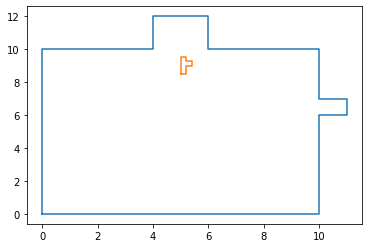

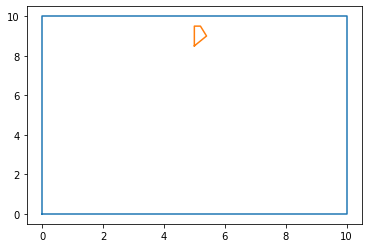

In [ ]:
ext = [(0,0), (0,10),(4,10),(4,12),(6,12),(6,10),(10,10), (10,7), (11,7), (11,6), (10,6), (10,0),(0,0)]
int_1 = [[(5,8.5), (5,9.5),(5.2,9.5), (5.2,9.3), (5.4,9.3), (5.4,9), (5.2,9), (5.2,8.5), (5,8.5)]]
pol = Polygon(ext,int_1)
pol1 = pol.simplify(2, preserve_topology=True )
pol2 = pol.simplify(2, preserve_topology=False )
print ('Pol: ' , pol)
print ('Pol original Valid: ', pol.is_valid, ' Simple: ', pol.is_simple)
print ('Pol1: ' , pol1) 
print ('Pol1 simplifié Valid: ', pol1.is_valid, ' Simple: ', pol1.is_simple)
print ('Pol2: ' , pol2)
print ('Pol2 simplifié Valid: ', pol2.is_valid, ' Simple: ', pol2.is_simple)
plt.plot(*pol.exterior.xy),   plt.plot(*pol.interiors[0].xy); plt.show()
plt.plot(*pol1.exterior.xy), plt.plot(*pol1.interiors[0].xy); plt.show()

Example d'un polygone avec une exclusion et 2 simplifications à faire
Il y un problèrme de topologie lors de la simplification et ce dernier n'est pas simplifié

Pol:  POLYGON ((0 0, 0 10, 4 10, 4 12, 6 12, 6 10, 10 10, 10 7, 11 7, 11 6, 10 6, 10 0, 0 0), (5 9.5, 5 10.5, 5.2 10.5, 5.2 10.3, 5.4 10.3, 5.4 10, 5.2 10, 5.2 9.5, 5 9.5))
Pol original Valid:  True  Simple:  True
Pol1:  POLYGON ((0 0, 0 10, 4 12, 10 10, 10 0, 0 0), (5 9.5, 5 10.5, 5.2 10.5, 5.4 10, 5 9.5))
Pol1 simplifié Valid:  True  Simple:  True


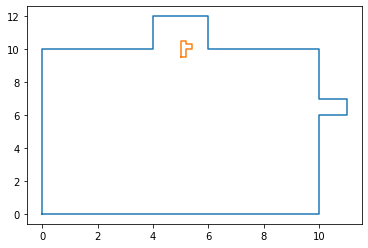

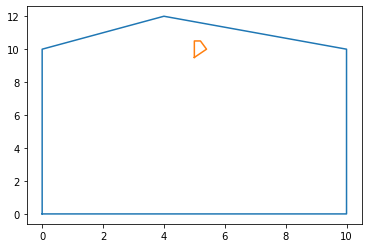

In [72]:
ext = [(0,0), (0,10),(4,10),(4,12),(6,12),(6,10),(10,10), (10,7), (11,7), (11,6), (10,6), (10,0),(0,0)]
int_1 = [[(5,9.5), (5, 10.5),(5.2,10.5), (5.2,10.3), (5.4,10.3), (5.4,10), (5.2,10), (5.2,9.5), (5,9.5)]]
pol = Polygon(ext,int_1)
pol1 = pol.simplify(2, preserve_topology=True )
print ('Pol: ' , pol)
print ('Pol original Valid: ', pol.is_valid, ' Simple: ', pol.is_simple)
print ('Pol1: ' , pol1)
print ('Pol1 simplifié Valid: ', pol1.is_valid, ' Simple: ', pol1.is_simple)
plt.plot(*pol.exterior.xy),   plt.plot(*pol.interiors[0].xy); plt.show()
plt.plot(*pol1.exterior.xy), plt.plot(*pol1.interiors[0].xy); plt.show()

Example d'un polygone avec une exclusion et 2 simplifications à faire
Même si elle cause un problème de topologie (l'exclusion) se retrouve à l'extérieur du polygone.
L'algorithme simplifie quand même le polygone
De plus, le polygone est invalid 

Pol:  POLYGON ((0 0, 0 10, 4 10, 4 12, 6 12, 6 10, 10 10, 10 7, 11 7, 11 6, 10 6, 10 0, 0 0), (5 10.5, 5 11.5, 5.2 11.5, 5.2 11.3, 5.4 11.3, 5.4 11, 5.2 11, 5.2 10.5, 5 10.5))
Pol original Valid:  True  Simple:  True
Pol1:  POLYGON ((0 0, 0 10, 10 10, 10 0, 0 0), (5 10.5, 5 11.5, 5.2 11.5, 5.4 11, 5 10.5))
Pol1 simplifié Valid:  False  Simple:  True


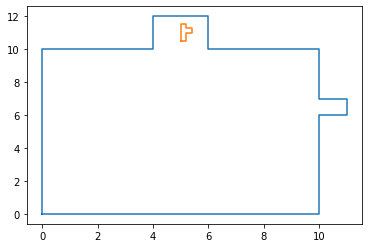

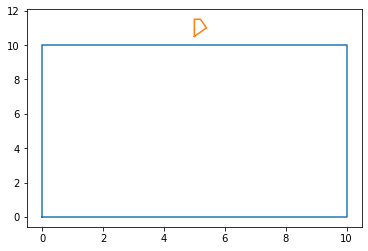

In [73]:
ext = [(0,0), (0,10),(4,10),(4,12),(6,12),(6,10),(10,10), (10,7), (11,7), (11,6), (10,6), (10,0),(0,0)]
int_1 = [[(5,10.5), (5, 11.5),(5.2,11.5), (5.2,11.3), (5.4,11.3), (5.4,11), (5.2,11), (5.2,10.5), (5,10.5)]]
pol = Polygon(ext,int_1)
pol1 = pol.simplify(2, preserve_topology=True )
print ('Pol: ' , pol)
print ('Pol original Valid: ', pol.is_valid, ' Simple: ', pol.is_simple)
print ('Pol1: ' , pol1)
print ('Pol1 simplifié Valid: ', pol1.is_valid, ' Simple: ', pol1.is_simple)
plt.plot(*pol.exterior.xy),   plt.plot(*pol.interiors[0].xy); plt.show()
plt.plot(*pol1.exterior.xy), plt.plot(*pol1.interiors[0].xy); plt.show()

Line:  LINESTRING (0 0, 3 0, 7 0, 7 2, 9 2, 9 0, 12 0, 12 -5, 8 -5, 8 1)
Line original Valid:  True  Simple:  True
Line1:  LINESTRING (0 0, 9 2, 12 -5, 8 -5, 8 1)
Line1 simplifié Valid:  True  Simple:  True


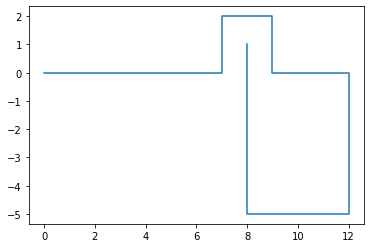

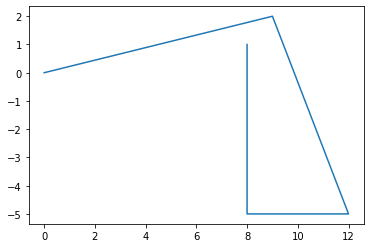

In [77]:
coords = [(0,0), (3,0), (7,0), (7,2), (9,2), (9,0), (12,0), (12,-5), (8,-5), (8,1)]
line = LineString(coords)
line1 = line.simplify(2, preserve_topology=True )
print ('Line: ' , line)
print ('Line original Valid: ', line.is_valid, ' Simple: ', line.is_simple)
print ('Line1: ' , line1)
print ('Line1 simplifié Valid: ', line1.is_valid, ' Simple: ', line1.is_simple)
plt.plot(*line.xy); plt.show()
plt.plot(*line1.xy); plt.show()

Line:  LINESTRING (0 0, 3 0, 7 0, 7 2, 9 2, 9 0, 12 0, 12 -5, 8 -5, 8 -0.01)
Line original Valid:  True  Simple:  True
Line1:  LINESTRING (0 0, 9 2, 12 -5, 8 -5, 8 -0.01)
Line1 simplifié Valid:  True  Simple:  True


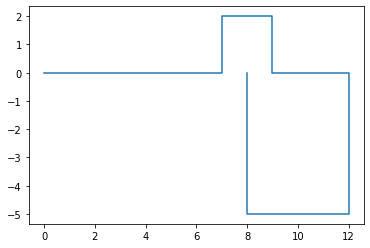

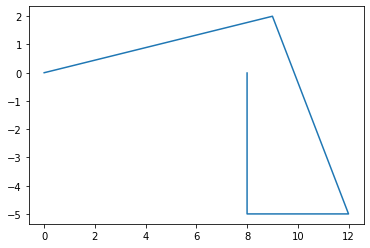

In [82]:
coords = [(0,0), (3,0), (7,0), (7,2), (9,2), (9,0), (12,0), (12,-5), (8,-5), (8,-.01)]
line = LineString(coords)
line1 = line.simplify(2, preserve_topology=True )
print ('Line: ' , line)
print ('Line original Valid: ', line.is_valid, ' Simple: ', line.is_simple)
print ('Line1: ' , line1)
print ('Line1 simplifié Valid: ', line1.is_valid, ' Simple: ', line1.is_simple)
plt.plot(*line.xy); plt.show()
plt.plot(*line1.xy); plt.show()

Pol:  POLYGON ((0 0, 0 10, 4 10, 4 12, 6 12, 6 10, 10 10, 10 7, 11 7, 11 6, 10 6, 10 0, 0 0), (5 10.5, 5 11.5, 5.2 11.5, 5.2 11.3, 5.4 11.3, 5.4 11, 5.2 11, 5.2 10.5, 5 10.5))
Pol original Valid:  True  Simple:  True


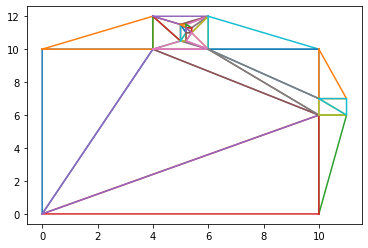

In [89]:
from shapely.ops import triangulate
ext = [(0,0), (0,10),(4,10),(4,12),(6,12),(6,10),(10,10), (10,7), (11,7), (11,6), (10,6), (10,0),(0,0)]
int_1 = [[(5,10.5), (5, 11.5),(5.2,11.5), (5.2,11.3), (5.4,11.3), (5.4,11), (5.2,11), (5.2,10.5), (5,10.5)]]
pol = Polygon(ext,int_1)
print ('Pol: ' , pol)
print ('Pol original Valid: ', pol.is_valid, ' Simple: ', pol.is_simple)
triangles = triangulate(pol, edges=False)
for triangle in triangles:
    plt.plot(*triangle.exterior.xy)
plt.show()

In [ ]:
l0 = LineString([(0,0),(0,20),(20,20),(20,0),(0,0)])
l1 = LineString([(1,1),(1,2),(2,2),(2,1),(1,1)])
l3 = LineString([(21,21),(21,22),(22,22),(22,1),(21,21)])
l4 = LineString([(5,5),(5,10),(10,10),(10,5),(5,5)])
l5 = LineString([(7,7),(7,9),(9,9),(9,7),(7,7)])
l6 = LineString([(12,12),(12,14),(14,14),(14,12),(12,12)])

p0 = Polygon(l0.coords)
p1 = Polygon(l1.coords)
p2 = Polygon(l2.coords)
p3 = Polygon(l3.coords)
p4 = Polygon(l4.coords)
p5 = Polygon(l5.coords)
p6 = Polygon(l6.coords)

pol = 
